<a href="https://colab.research.google.com/github/Vikash9570/CNN_practice/blob/main/CNN_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
cv2.__version__

'4.8.0'

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import numpy as np


In [3]:
img_path="/content/_20160523_165306.JPG"

In [4]:
img=cv2.imread(img_path)


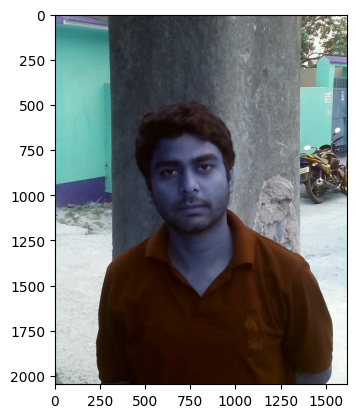

In [5]:
plt.imshow(img)

In [6]:
rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

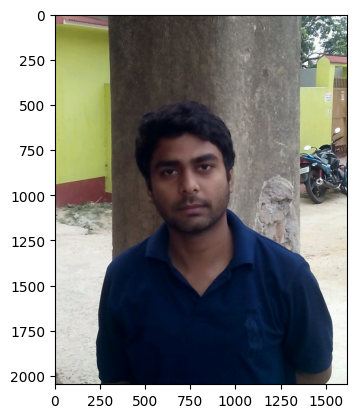

In [7]:
plt.imshow(rgb_img)

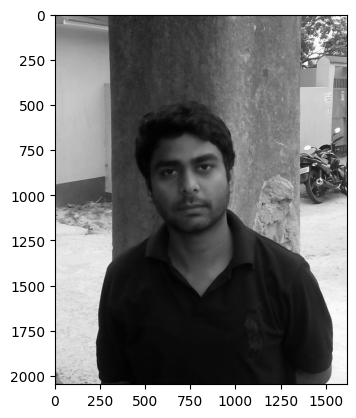

In [8]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap="gray")

In [9]:
gray_img

array([[137, 136, 137, ..., 247, 239, 221],
       [138, 137, 137, ..., 252, 251, 245],
       [138, 137, 136, ..., 247, 244, 246],
       ...,
       [114, 116, 116, ..., 243, 237, 237],
       [117, 116, 112, ..., 243, 236, 236],
       [123, 120, 115, ..., 243, 243, 243]], dtype=uint8)

In [10]:
gray_img.shape

(2047, 1618)

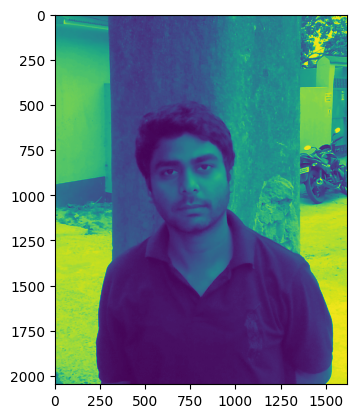

In [11]:
bw_img=cv2.cvtColor(rgb_img,cv2.COLOR_RGB2GRAY)
plt.imshow(bw_img)

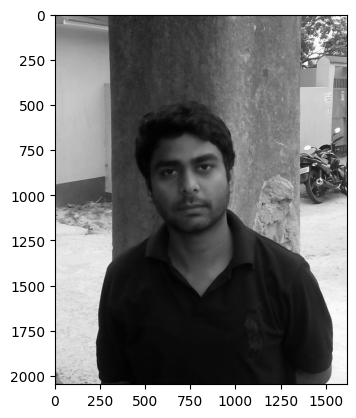

In [12]:
bw_2img=cv2.cvtColor(rgb_img,cv2.COLOR_RGB2GRAY)
plt.imshow(bw_img,cmap="gray")

In [13]:
grey_2img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)

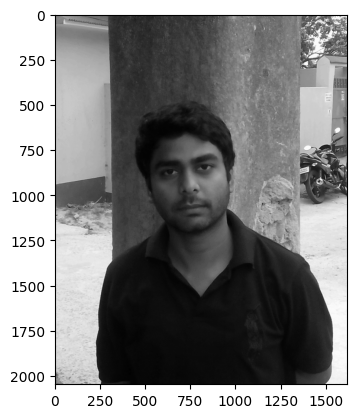

In [14]:
plt.imshow(grey_2img,cmap="gray")

In [15]:
grey_2img

array([[137, 136, 137, ..., 247, 239, 221],
       [138, 137, 137, ..., 252, 251, 245],
       [138, 137, 136, ..., 247, 244, 246],
       ...,
       [114, 116, 116, ..., 243, 237, 237],
       [117, 116, 112, ..., 243, 236, 236],
       [123, 120, 115, ..., 243, 243, 243]], dtype=uint8)

In [16]:
gray_img

array([[137, 136, 137, ..., 247, 239, 221],
       [138, 137, 137, ..., 252, 251, 245],
       [138, 137, 136, ..., 247, 244, 246],
       ...,
       [114, 116, 116, ..., 243, 237, 237],
       [117, 116, 112, ..., 243, 236, 236],
       [123, 120, 115, ..., 243, 243, 243]], dtype=uint8)

In [17]:
bw_img

array([[137, 136, 137, ..., 247, 239, 221],
       [138, 137, 137, ..., 252, 251, 245],
       [138, 137, 136, ..., 247, 244, 246],
       ...,
       [114, 116, 116, ..., 243, 237, 237],
       [117, 116, 112, ..., 243, 236, 236],
       [123, 120, 115, ..., 243, 243, 243]], dtype=uint8)

In [18]:
gray=255-bw_img

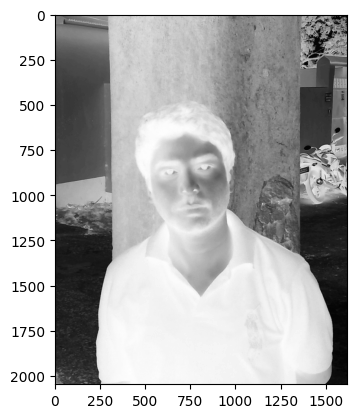

In [19]:
plt.imshow(gray,cmap="gray")

In [20]:
gray

array([[118, 119, 118, ...,   8,  16,  34],
       [117, 118, 118, ...,   3,   4,  10],
       [117, 118, 119, ...,   8,  11,   9],
       ...,
       [141, 139, 139, ...,  12,  18,  18],
       [138, 139, 143, ...,  12,  19,  19],
       [132, 135, 140, ...,  12,  12,  12]], dtype=uint8)

In [21]:
rgb_img.shape

(2047, 1618, 3)

**image manipulation**

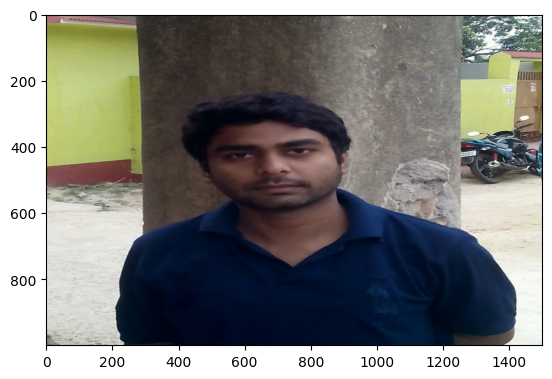

In [22]:
resiz_img=cv2.resize(rgb_img,(1500,1000))
plt.imshow(resiz_img)

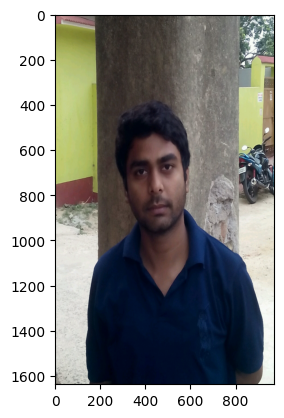

In [23]:
w_ratio=0.6
h_ratio=0.8
new_img=cv2.resize(rgb_img,(0,0),img,w_ratio,h_ratio)
plt.imshow(new_img)

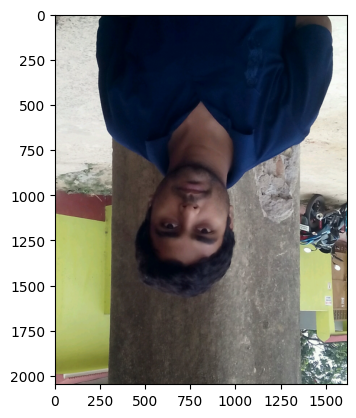

In [24]:
rgb_flip_x=cv2.flip(rgb_img,0)
plt.imshow(rgb_flip_x)

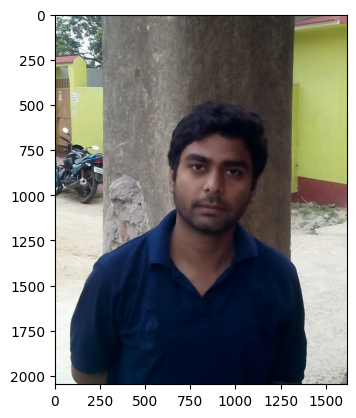

In [25]:
flip_y=cv2.flip(rgb_img,1)
plt.imshow(flip_y)

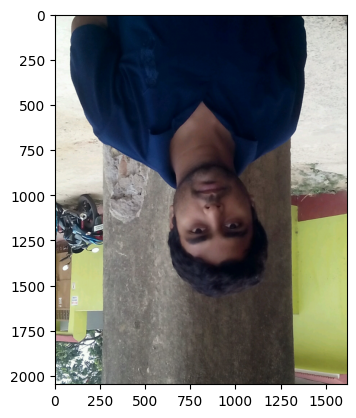

In [26]:
flip_both_axis=cv2.flip(rgb_img,-1)
plt.imshow(flip_both_axis)

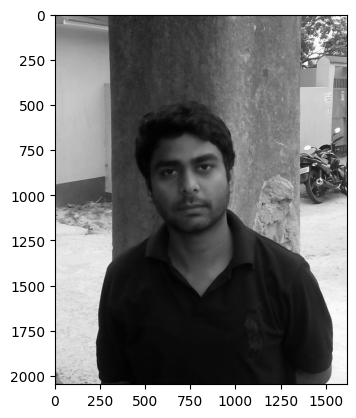

In [27]:
plt.imshow(gray_img,cmap="gray")

In [28]:
re_size=cv2.resize(gray_img,(256,256))

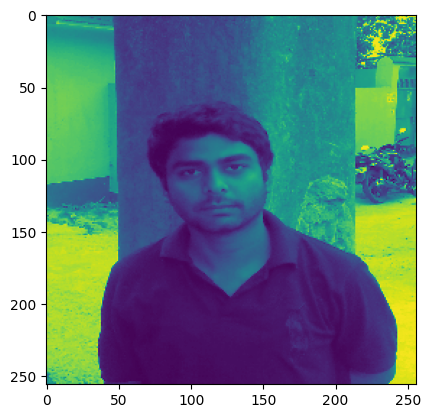

In [29]:
plt.imshow(re_size)

In [30]:
re_size.shape

(256, 256)

In [31]:
row,col=re_size.shape

In [32]:
re_size_gray = re_size.reshape(1,row,col, 1)

In [33]:
re_size_gray.shape

(1, 256, 256, 1)

In [34]:

conv_layer=[tf.keras.layers.Conv2D(
    filters=10,
    kernel_size=(4,4),
    strides=(1,1),
    input_shape=re_size_gray.shape[1:]
)]

In [35]:
conv_model=tf.keras.Sequential(conv_layer)

In [36]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 10)      170       
                                                                 
Total params: 170 (680.00 Byte)
Trainable params: 170 (680.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
output=conv_model.predict(re_size_gray)

1/1 [==============================] - 0s 284ms/step


In [38]:
output.shape

(1, 253, 253, 10)

In [39]:
row,col=output.shape[1:-1]

In [40]:
out=np.reshape(output,(row,col,10))

In [41]:
out.shape

(253, 253, 10)

In [42]:
row,col,depth=output.shape[1:]

In [43]:
out_img=output.reshape(row,col,depth)

In [44]:
out_img.shape[:]

(253, 253, 10)

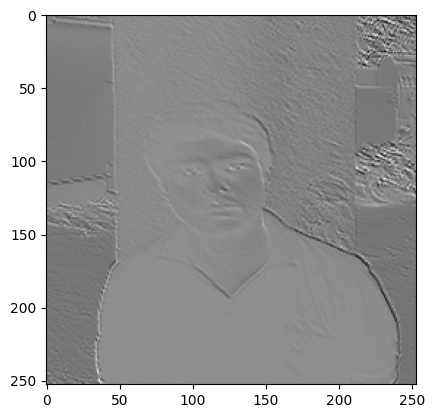

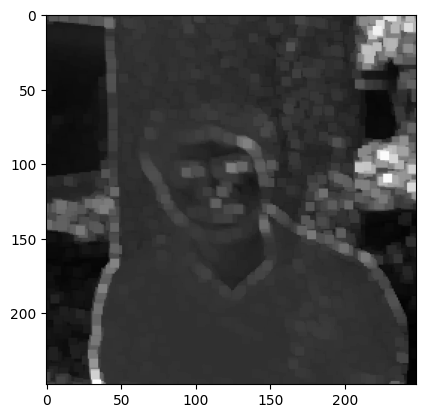

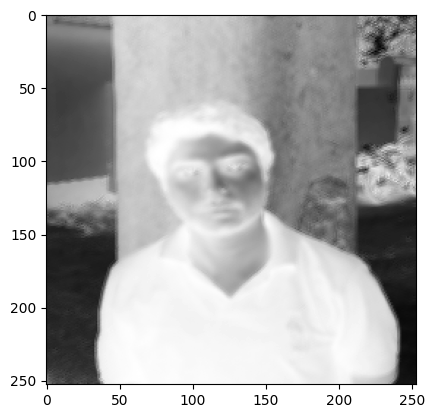

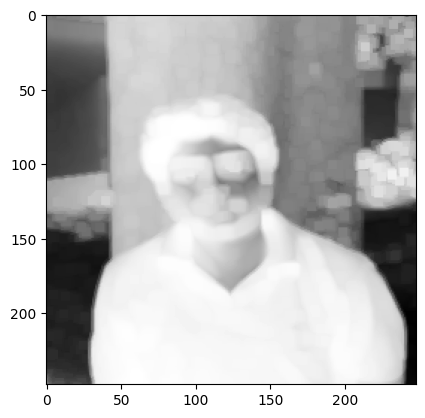

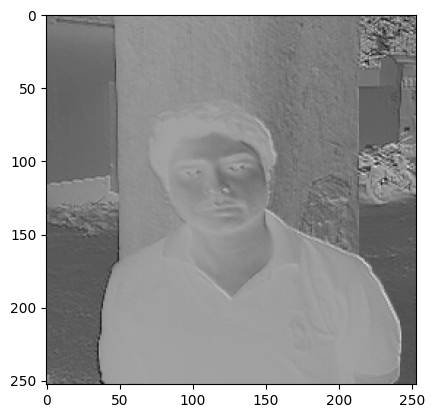

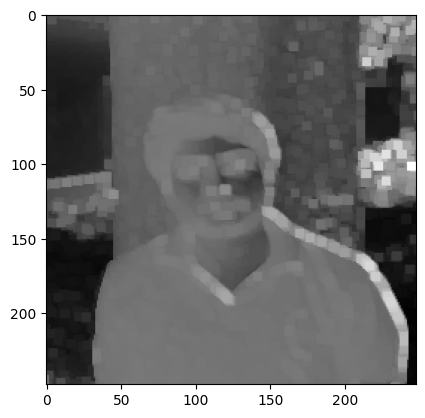

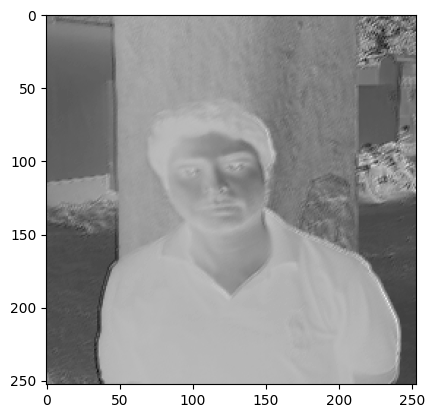

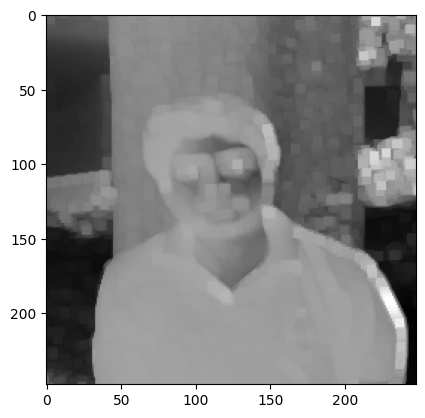

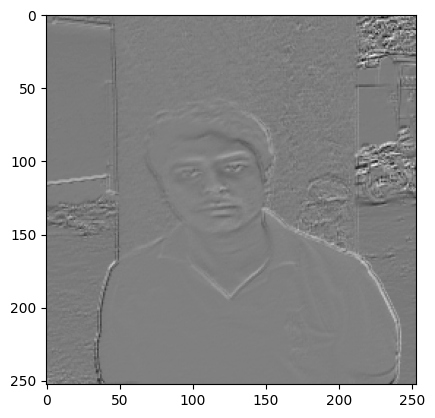

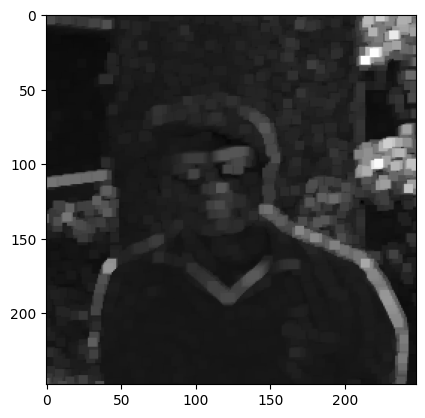

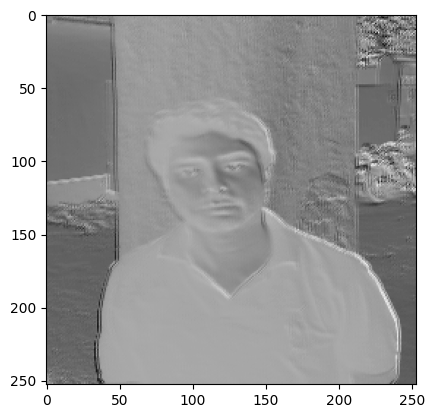

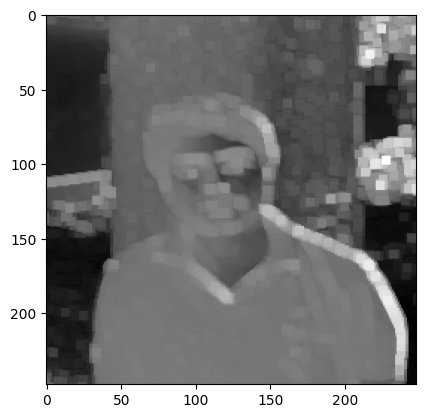

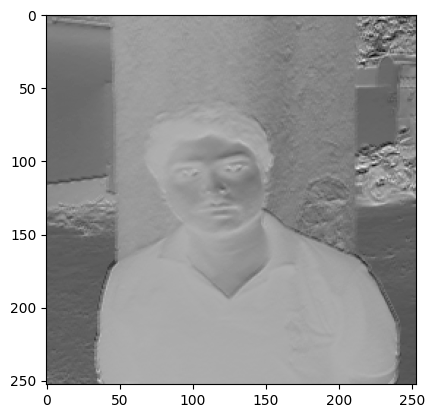

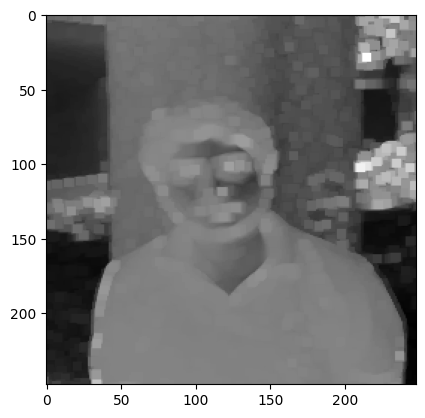

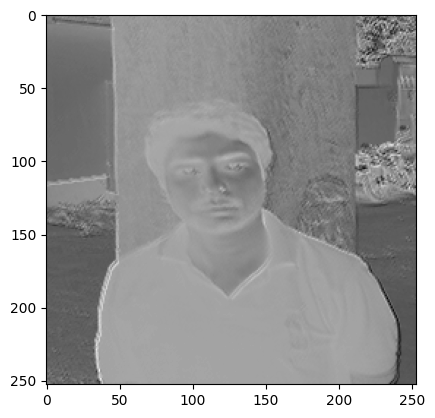

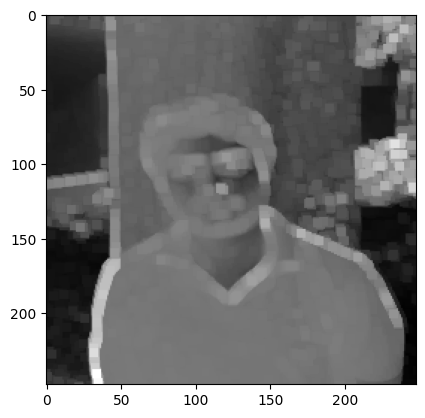

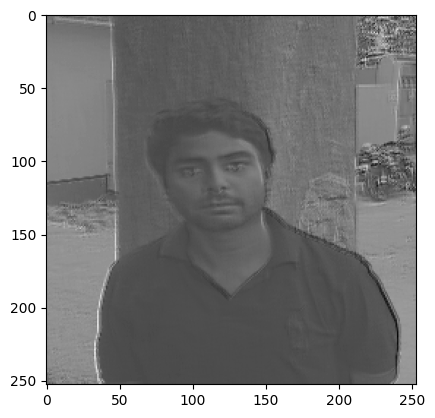

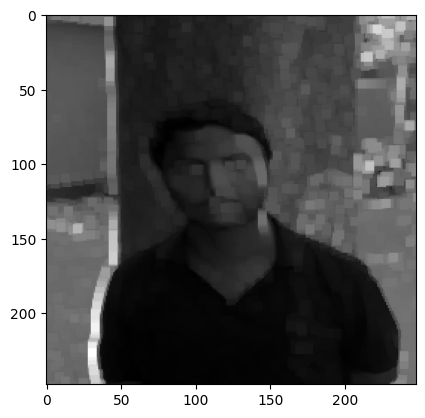

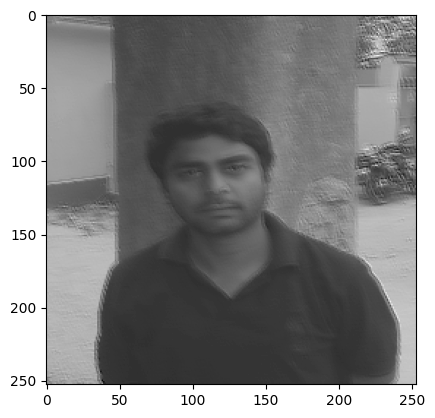

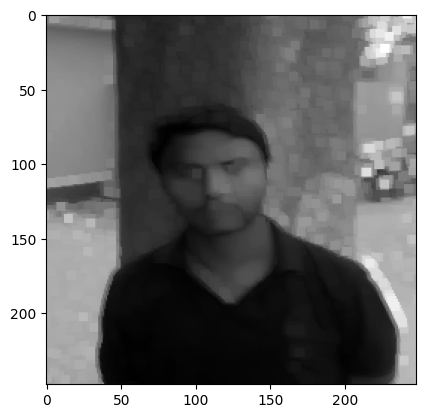

In [45]:
max_pool=tf.keras.layers.MaxPool2D(pool_size=(6,6),strides=(1,1))
for i in range(depth):
  plt.imshow(out_img[:,:,i],cmap="gray")
  plt.show()
  row,col=out_img.shape[:-1]
  reshape_img=out_img[:,:,i].reshape(1,row,col,1)
  reshape_out=max_pool(reshape_img)
  row,col=reshape_out.shape[1:-1]
  max_out=tf.reshape(reshape_out,(row,col))
  plt.imshow(max_out,cmap="gray")
  plt.show()
  print("="*60)


In [46]:
rgb_img.shape

(2047, 1618, 3)

**Color image convolution**

In [47]:
resize_rgb=cv2.resize(rgb_img,(256,256))

In [48]:
resize_rgb.shape

(256, 256, 3)

In [49]:
row,col,depth=resize_rgb.shape

In [50]:
reshape_rgb=resize_rgb.reshape(1,row,col,depth)

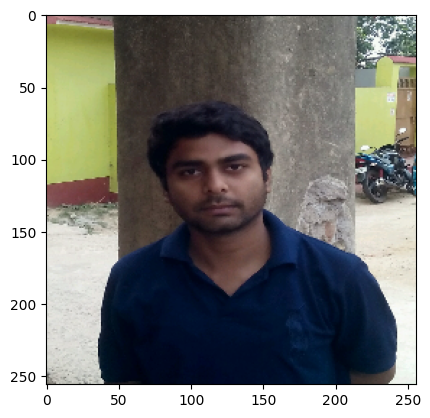

In [51]:
plt.imshow(resize_rgb)


In [52]:
rgb_conv=[tf.keras.layers.Conv2D(
    filters=5,
    kernel_size=(4,4),
    strides=(1,1),
    input_shape=resize_rgb.shape
)]

In [53]:
rgb_out=tf.keras.Sequential(rgb_conv)

In [54]:
rgb_out.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 253, 253, 5)       245       
                                                                 
Total params: 245 (980.00 Byte)
Trainable params: 245 (980.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
rgb_pred=rgb_out.predict(reshape_rgb)

1/1 [==============================] - 0s 58ms/step


In [56]:
rgb_pred.shape

(1, 253, 253, 5)

In [57]:
row,col,depth=rgb_pred.shape[1:]

In [58]:
depth

5

In [59]:
rgb_pred=rgb_pred.reshape(row,col,depth)

In [60]:
rgb_pred.shape

(253, 253, 5)

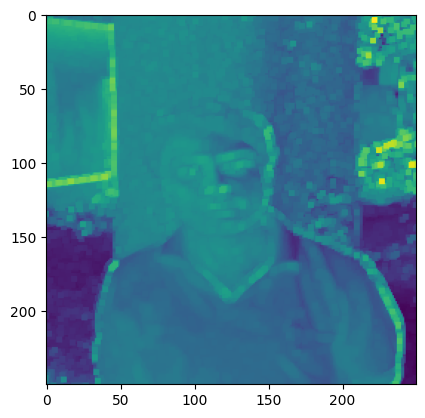

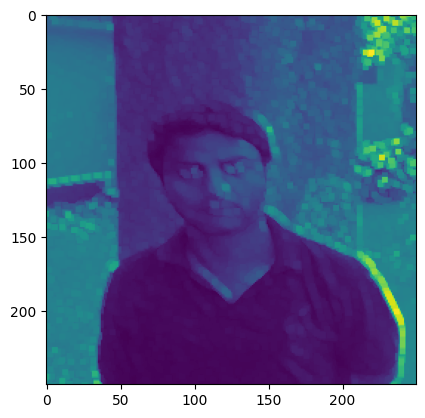

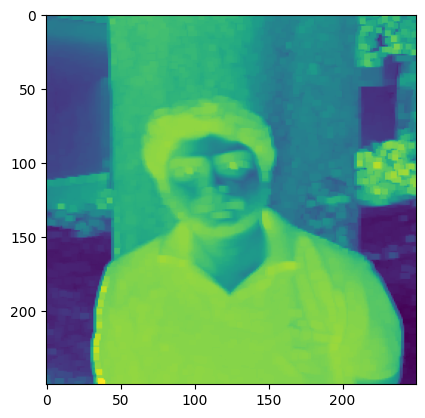

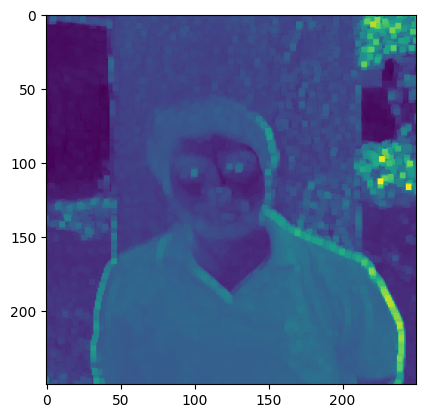

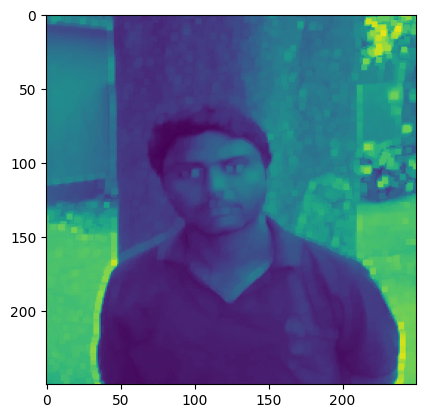

In [61]:
rgb_max=tf.keras.layers.MaxPool2D(pool_size=(4,4),strides=(1,1))
for i in range(depth):

  plt.imshow(rgb_pred[:,:,i])
  row,col=rgb_pred[:,:,i].shape
  rgb_pred_resize=tf.reshape(rgb_pred[:,:,i],(1,row,col,1))
  max_rgb_out=rgb_max(rgb_pred_resize)
  row,col=max_rgb_out.shape[1:-1]
  resize_max_out=tf.reshape(max_rgb_out,(row,col))
  plt.imshow(resize_max_out)
  plt.show()
  print("="*70)
